# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros.
-Aplique três métodos de clustering distintos nas duas bases acima.
-Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import seaborn as sns
import warnings
from IPython.display import Image
import pyclustering as pycls

%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Dados

É um fato bem conhecido que Millenials amam torradas de abacate. Também é um fato bem conhecido que todos os Millenials vivem nos porões de seus pais.
Claramente, eles não estão comprando em casa porque estão comprando muito torradas de abacate!
Mas talvez haja esperança ... se um Millenial pudesse encontrar uma cidade com abacates baratos, eles poderiam viver o Millenial American Dream.

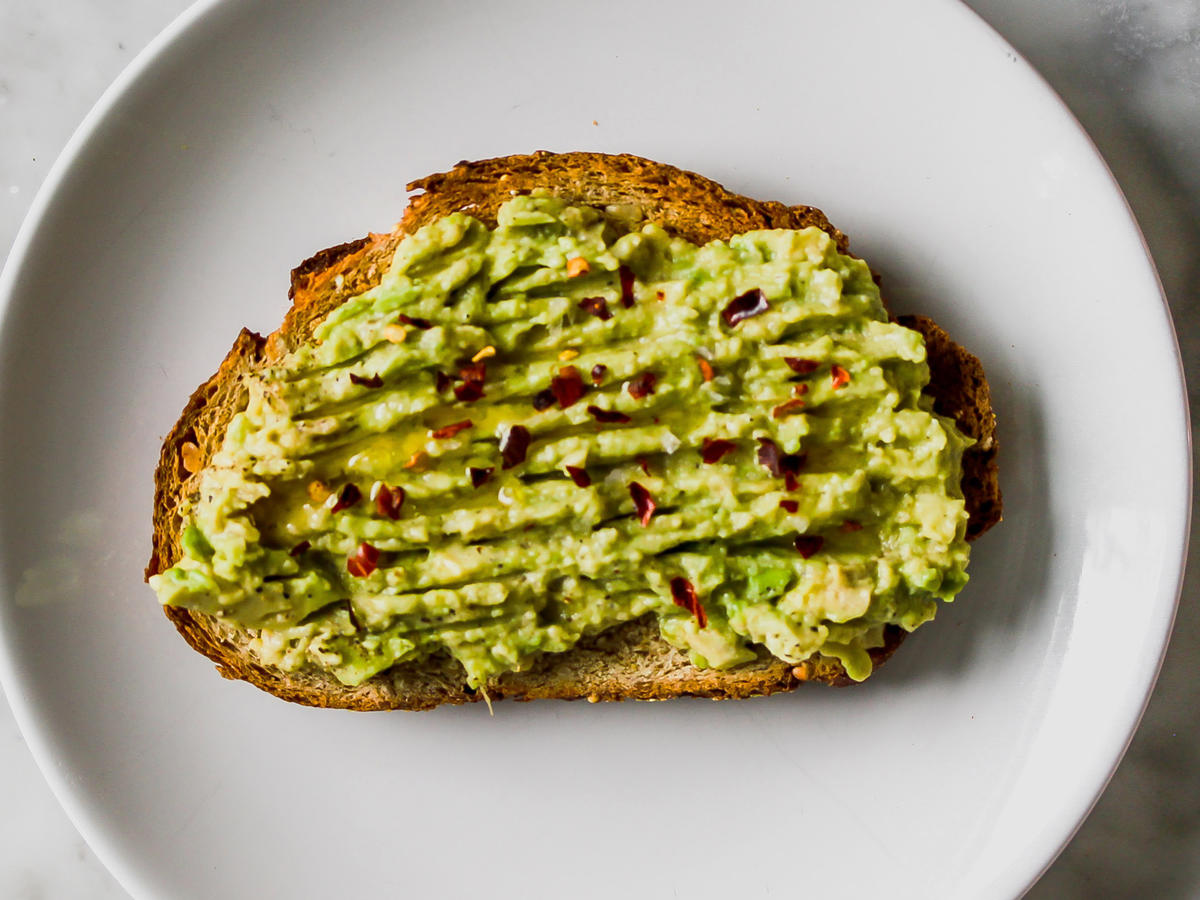

In [2]:
Image("1807w-avocado-toast-recipe.jpg", width=400, height=400)

Os dados abaixo representam dados semanais de varredura de varejo de 2018 para o volume nacional de varejo (unidades) e preço. Os dados de varredura de varejo vêm diretamente das caixas registradoras dos varejistas com base nas vendas reais de abacates da Hass. A partir de 2013, a tabela abaixo reflete um conjunto de dados de varejo ampliado, com várias saídas. Os relatórios de múltiplas saídas incluem uma agregação dos seguintes canais: supermercado, massa, clube, droga, dólar e militar. O preço médio (de abacates) na tabela reflete um custo por unidade (por abacate), mesmo quando várias unidades (abacates) são vendidas em sacos. Os códigos de pesquisa de produto (PLUs) na tabela são apenas para abacates Hass. Outras variedades de abacates (por exemplo, greenskins) não estão incluídas nesta tabela.

## 1.1 Informações sobre os dados:

#### Atributos:
- Date - A data da observação
- AveragePrice - o preço médio de um único abacate
- type - convencional ou orgânico
- year - o ano
- Region - a cidade ou região da observação
- Total Volume - Número total de abacates vendidos
- 4046 - Número total de abacates com PLU 4046 vendidos
- 4225 - Número total de abacates com PLU 4225 vendidos
- 4770 - Número total de abacates com PLU 4770 vendidos


## 1.2 Carregamento e avaliação inicial

In [3]:
data = pd.read_csv('avocado.csv')

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# 2. Pré-processamento

### 2.1 Drop de coluna desnecessária

In [5]:
data.drop(columns=['Unnamed: 0'], inplace = True)

### 2.2 Transformação de Date em Mês Dia

In [6]:
data_list = data.to_dict(orient='list')

lista_ano = []
lista_mes = []
lista_dia = []

for instancia in data_list['Date']:
    time = instancia.split(sep = '-')
    lista_mes.append(int(time[1]))
    lista_dia.append(int(time[2]))
    
data_list['month'] = lista_mes
data_list['day'] = lista_dia

data = pd.DataFrame(data_list)
data.drop(columns=['Date'], inplace = True)
data = data[['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'year',  'month', 'day']]

In [7]:
data = data.sort_values(by=['year','month','day','region','type']).reset_index(drop = True)

In [8]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,year,month,day
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015,1,4
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015,1,4
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015,1,4
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015,1,4
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015,1,4


### 2.3 Verificando elementos vazios

In [9]:
data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
year            0
month           0
day             0
dtype: int64

### 2.4 Análise estatística

### 2.4.1 Correlação

In [10]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [11]:
data.groupby(by=['region']).mean().sort_values(by=['AveragePrice'], ascending = False).head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
region,,,,,,,,,,,,
HartfordSpringfield,1.818639,149912.832722,3904.301302,111975.202219,503.708994,33529.623166,31889.232781,1410.793580,229.590888,2016.147929,6.177515,15.662722
SanFrancisco,1.804201,401864.472722,100996.715325,246014.975000,10796.791361,44055.991036,42906.364320,523.488876,626.137840,2016.147929,6.177515,15.662722
NewYork,1.727574,712231.146538,22601.558521,483295.393136,5168.053580,201166.144260,172786.042899,27316.560888,1063.543432,2016.147929,6.177515,15.662722
Philadelphia,1.632130,212540.823018,13654.440710,126474.659408,1774.944053,70636.781805,63363.976006,6958.744497,314.058343,2016.147929,6.177515,15.662722
Sacramento,1.621568,222377.949290,69382.852130,121825.190473,4595.151893,26574.757751,25730.298728,226.967574,617.488491,2016.147929,6.177515,15.662722


In [12]:
dict_quantidade = {}

for ano in data.year.unique():
    dict_quantidade[ano] = data['Total Volume'][data.year == ano].sum()

In [13]:
dict_quantidade

{2015: 4385468662.04,
 2016: 4820889891.83,
 2017: 4934305699.27,
 2018: 1382738340.26}

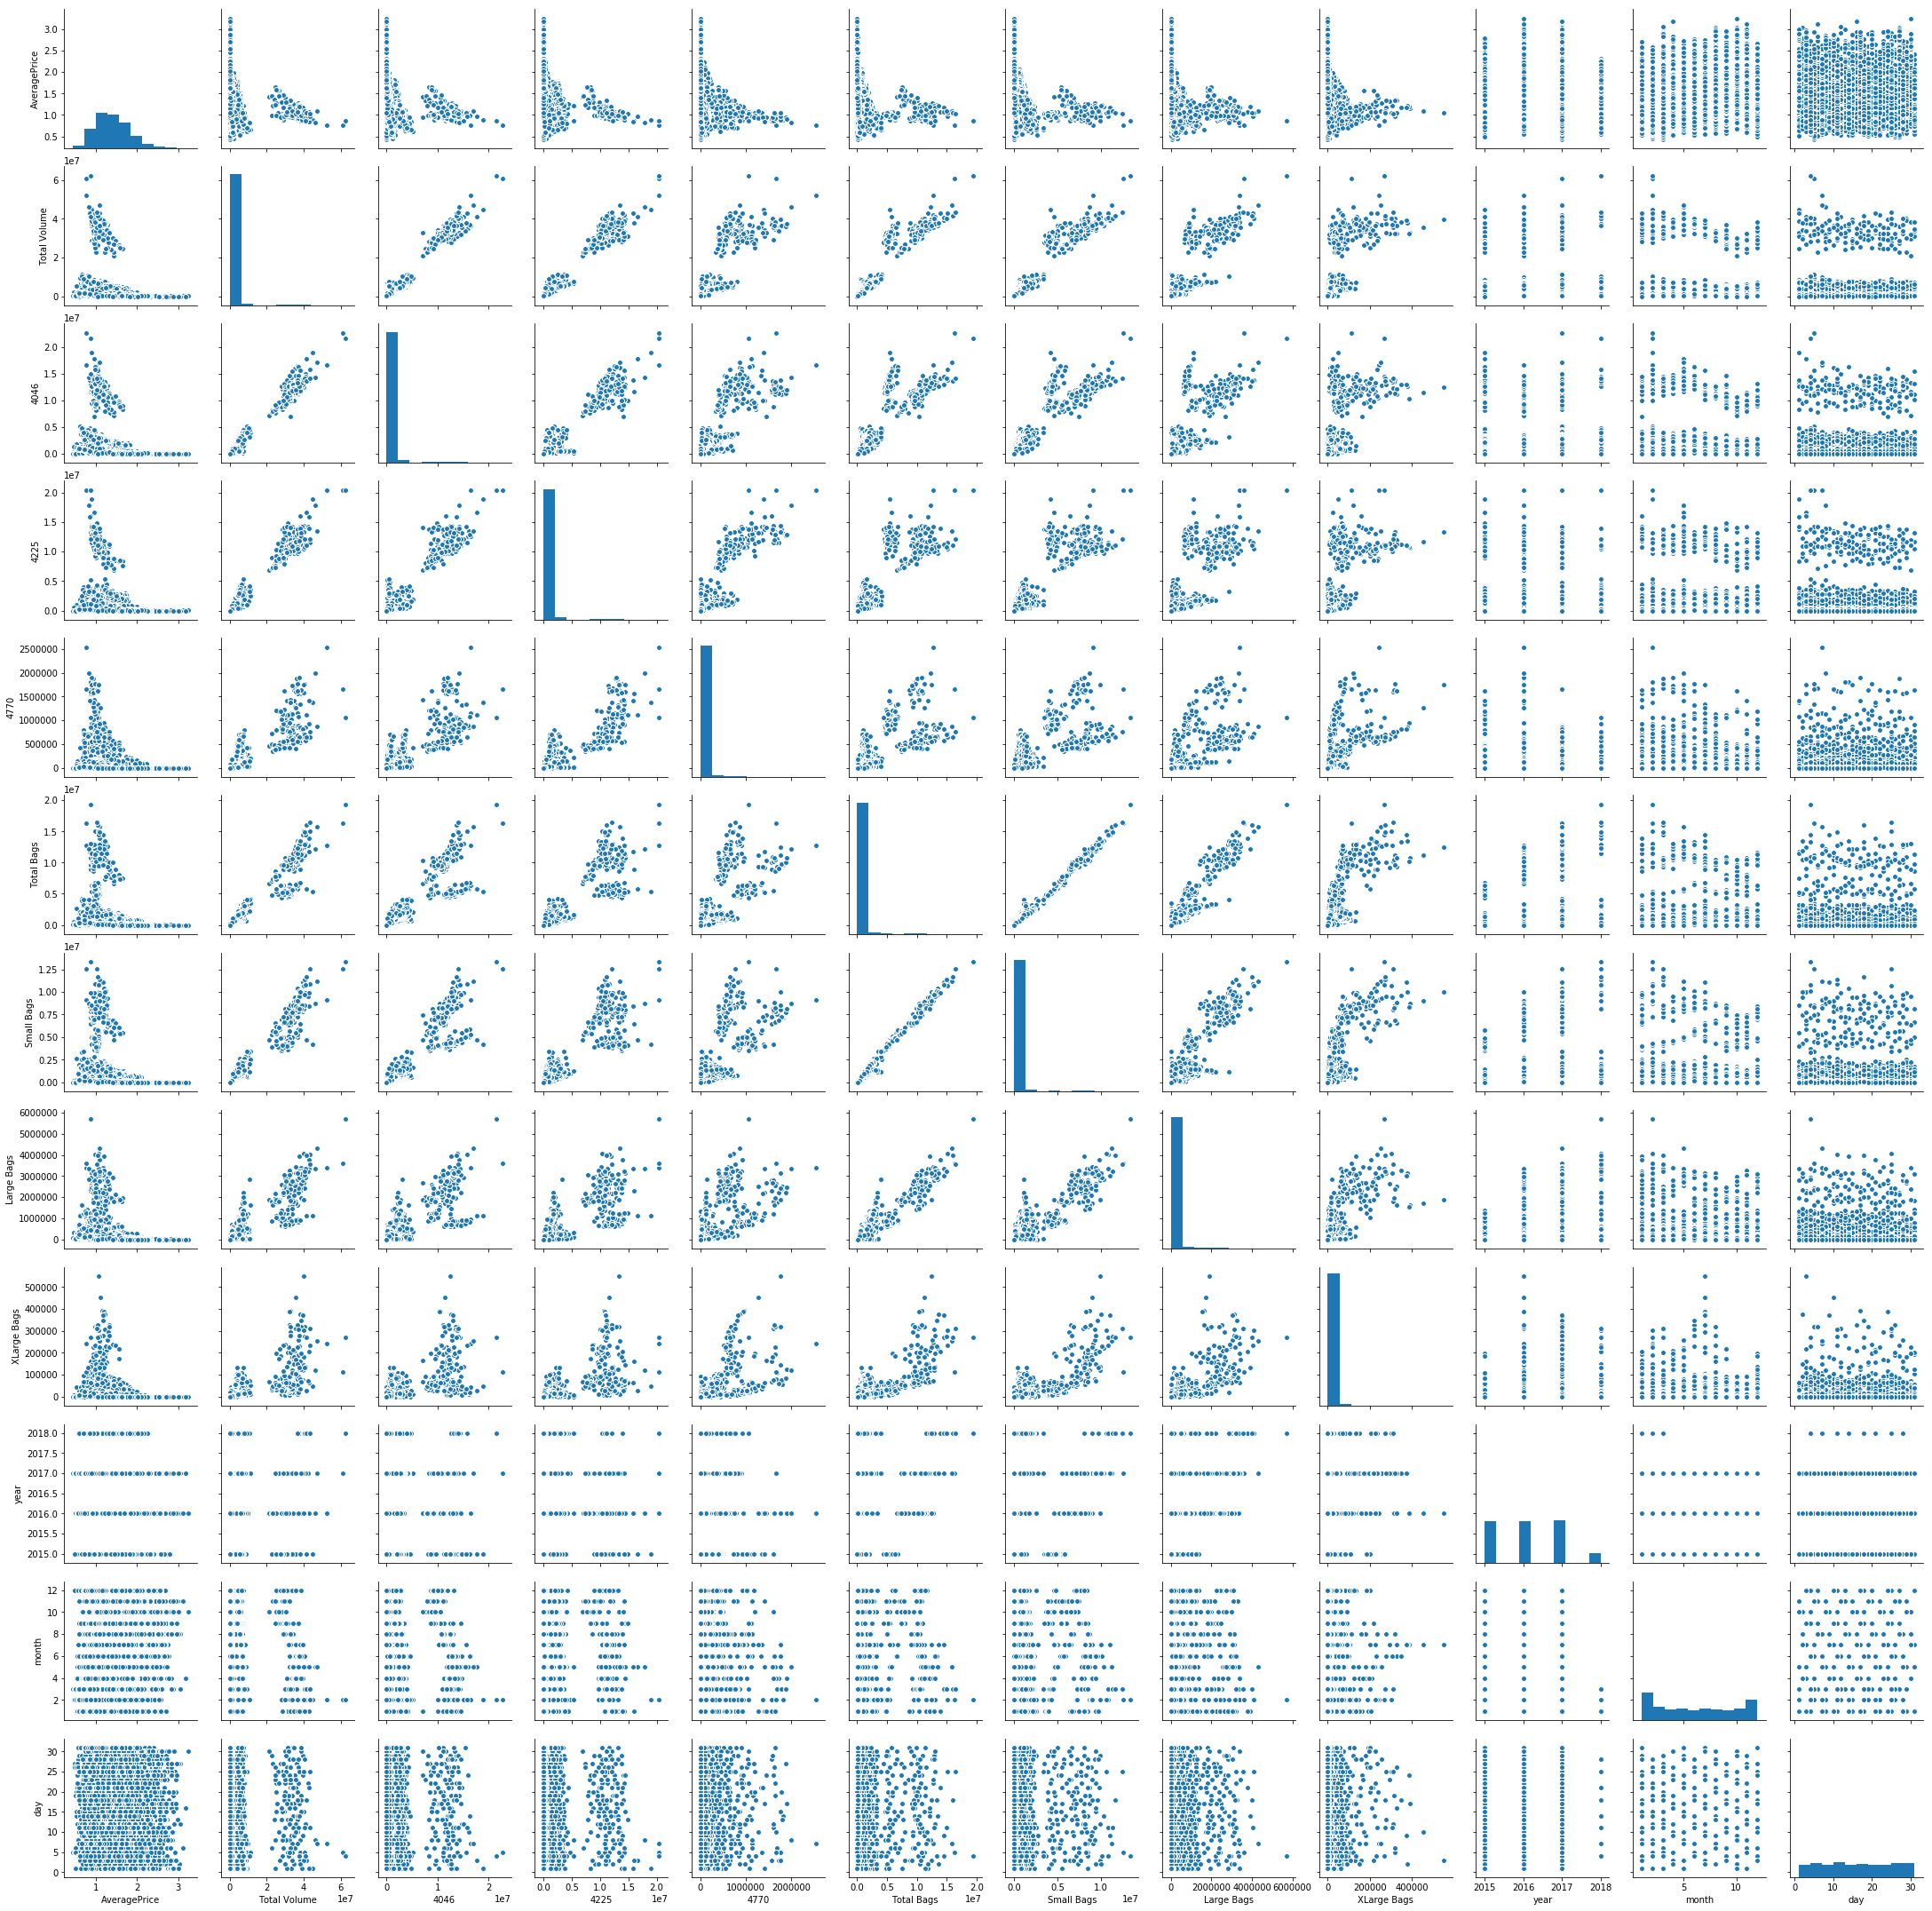

In [18]:
sns.pairplot(data)
plt.show()


### 2.5

### 2.6

### 2.7

### 2.8

Diversas alternativas podem ser tomadas para correção dos dados faltantes, para os valores da bases adotou-se a estratégia de usar a média do atributo para o preenchimento

In [9]:
# Função para calcular a média contendo atributos vazios no DataFrame

def mean_attribute(atributo):
    conta_linha = soma_media = 0
    for numero in atributo:
        if not math.isnan(numero):
            soma_media += numero
            conta_linha +=1
            
    return float(soma_media/conta_linha)

In [10]:
# Transforma os dados que estão em string para float para aplicar a função mean_attribute()

for atributo in data.columns:
    for linha in range(len(data[atributo])):
        if isinstance(data[atributo][linha], str):
            data.loc[linha, atributo] = float(data[atributo][linha])

In [11]:
# Atribui para os valores faltantes a média do atributo

for atributo in data.columns:
    media_atributo = mean_attribute(data[atributo])
    
    for linha in range(len(data[atributo])):
        if math.isnan(data[atributo][linha]):
            data.loc[linha, atributo] = media_atributo

In [12]:
# Arredonda para atributos selecionados

atributos_selecionados = ['Age','Sex','Access_road','Active','Passive']

for atributo in atributos_selecionados:
    for linha in range(len(data[atributo])):
        data.loc[linha, atributo] = np.float64(round(data[atributo][linha]))

In [13]:
data.head(15)

,Age,Sex,Income,Travel_cost,Access_road,Active,Passive,Logged_income,Trips
0,35.0,0.0,250,48.0003,1.0,1.0,0.0,5.52146,0
1,25.0,1.0,218.75,52.2,0.0,2.0,2.0,5.38793,0
2,37.0,0.0,1875,163.5,0.0,0.0,0.0,7.53636,0
3,29.0,1.0,781.25,87,0.0,0.0,0.0,6.6609,0
4,54.0,0.0,562.5,21,0.0,0.0,0.0,6.33239,0
5,34.0,0.0,218.75,60,1.0,0.0,1.0,5.38793,0
6,40.0,0.0,468.75,56.4,1.0,0.0,0.0,6.15007,0
7,32.0,1.0,2187.5,48.0003,0.0,1.0,1.0,7.69051,0
8,62.0,1.0,781.25,56.4,0.0,2.0,2.0,6.6609,0
9,36.0,1.0,937.5,48.0003,0.0,2.0,1.0,6.84322,0


In [14]:
data.isnull().sum()

Age              0
Sex              0
Income           0
Travel_cost      0
Access_road      0
Active           0
Passive          0
Logged_income    0
Trips            0
dtype: int64

#### Resolvendo problema 3

StandardScaler padroniza os recursos removendo a média e o dimensionamento para a variância 

In [15]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data.drop(columns=['Trips']), y = data.Trips)

In [16]:
data_scaler

array([[ 0.05998793, -0.87956815, -1.08342098, ..., -0.01413951,
        -0.90947806, -1.34671267],
       [-0.76660165,  1.01772021, -1.12651377, ...,  0.81807165,
         1.11595417, -1.50783244],
       [ 0.22530585, -0.87956815,  1.15740421, ..., -0.84635067,
        -0.90947806,  1.08448136],
       ...,
       [-1.01457852, -0.87956815, -1.16960657, ...,  4.14691628,
         0.10323805, -1.69383158],
       [-0.8492606 , -0.87956815, -1.07427841, ..., -0.84635067,
        -0.90947806, -1.31513043],
       [ 2.62241563, -0.87956815, -0.13537955, ..., -0.84635067,
        -0.90947806,  0.24812583]])

# 3. Visualização

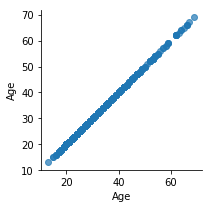

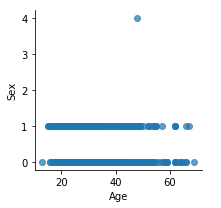

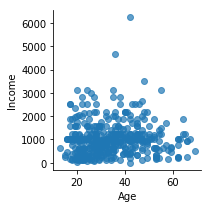

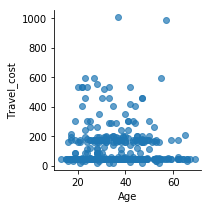

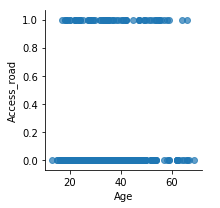

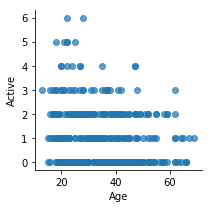

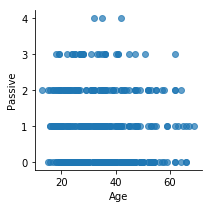

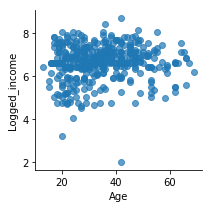

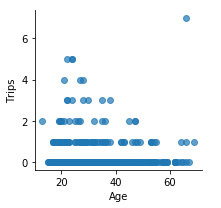

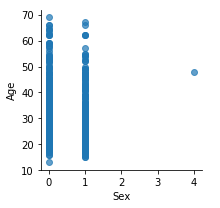

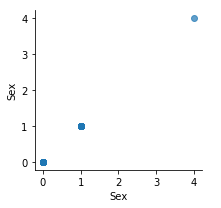

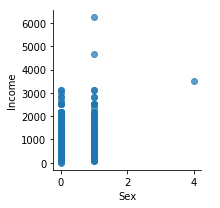

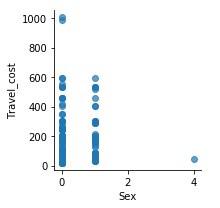

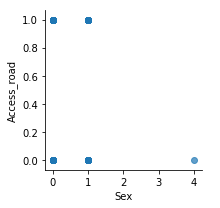

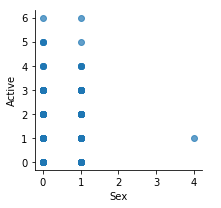

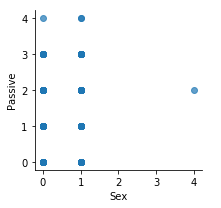

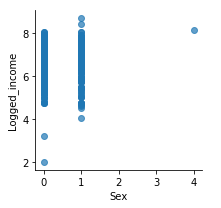

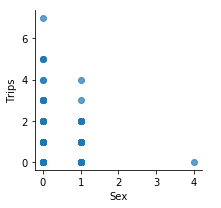

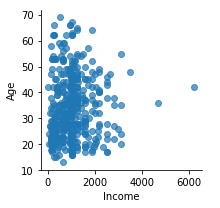

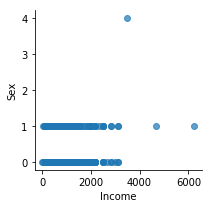

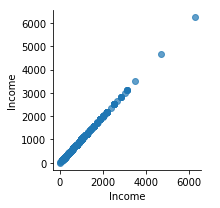

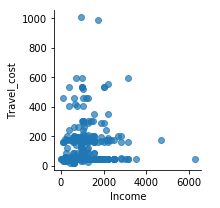

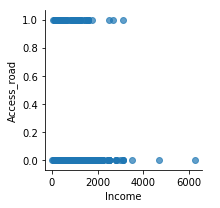

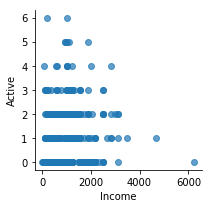

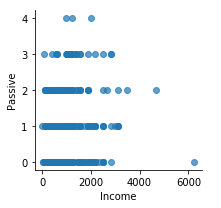

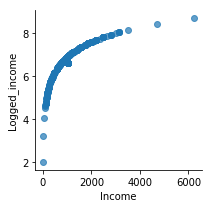

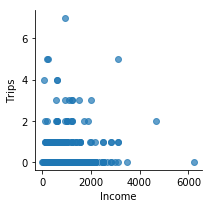

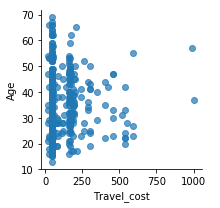

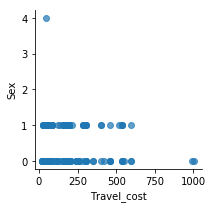

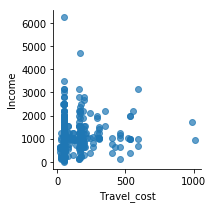

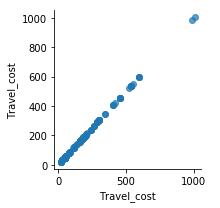

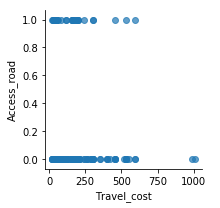

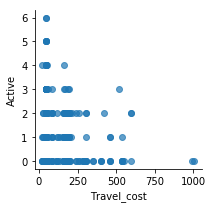

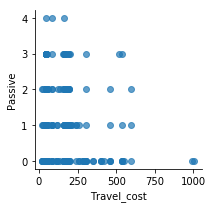

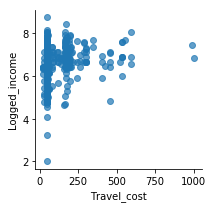

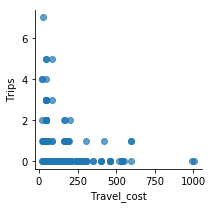

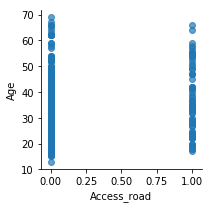

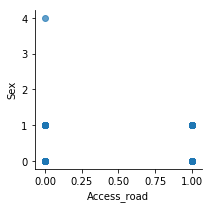

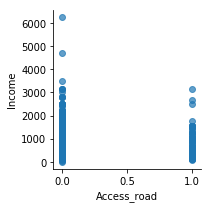

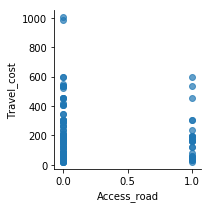

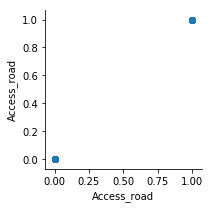

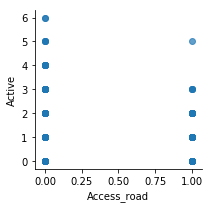

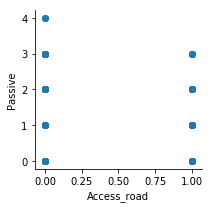

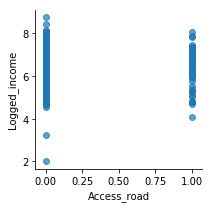

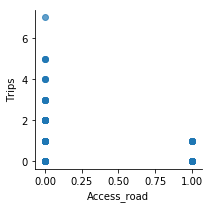

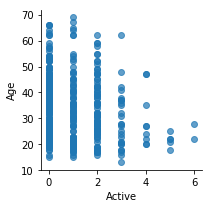

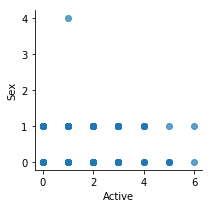

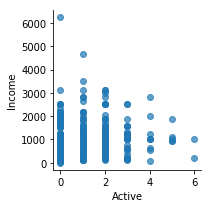

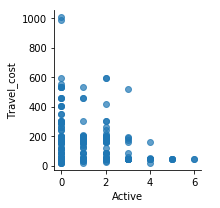

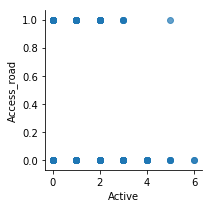

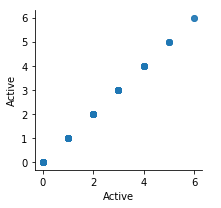

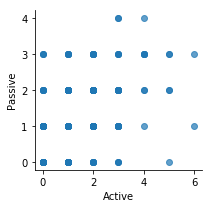

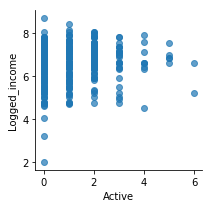

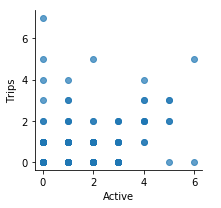

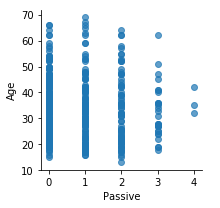

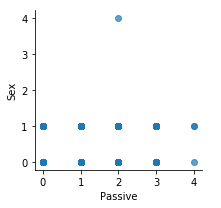

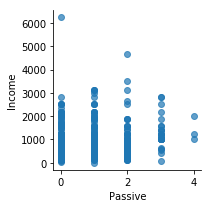

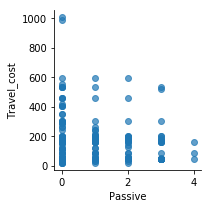

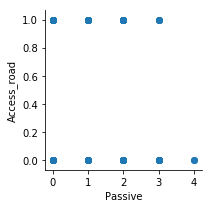

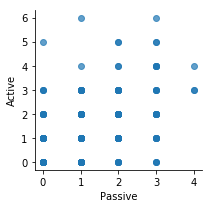

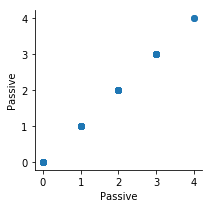

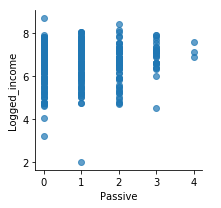

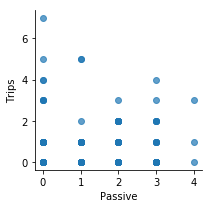

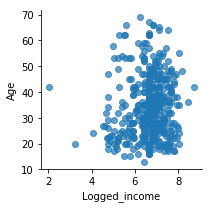

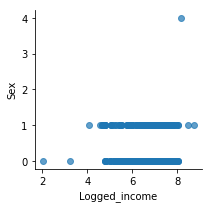

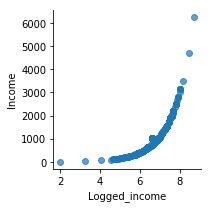

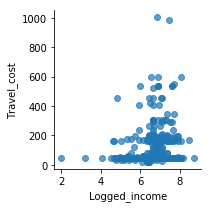

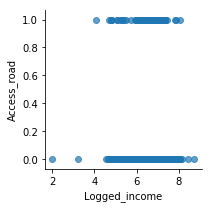

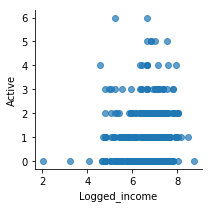

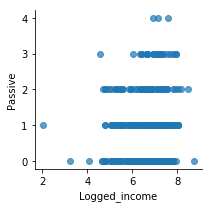

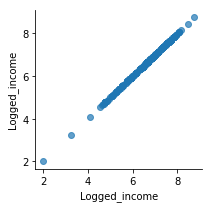

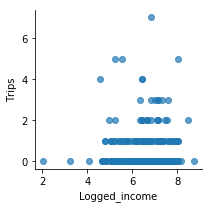

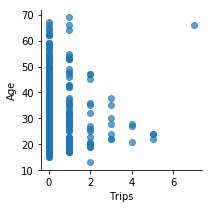

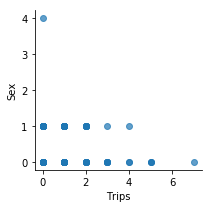

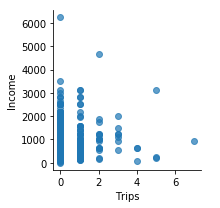

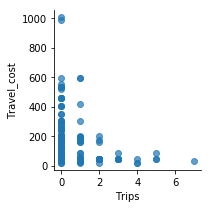

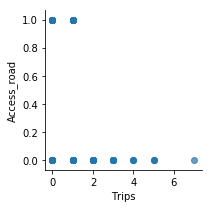

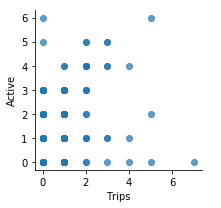

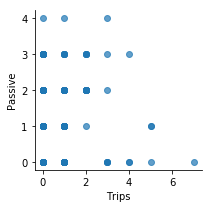

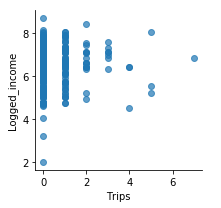

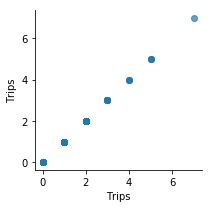

In [17]:
for atributo1 in data.columns:
    for atributo2 in data.columns:
        g = sns.FacetGrid(data, margin_titles=True)
        g.map(plt.scatter, atributo1, atributo2, alpha=.7)
        g.add_legend();
        g.

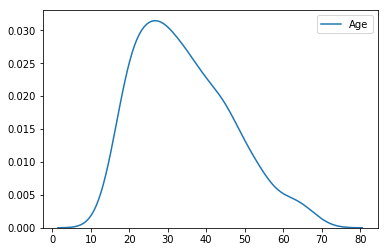

In [18]:
sns.kdeplot(data.Age)

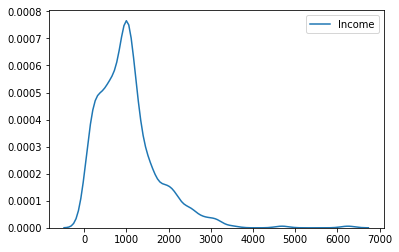

In [19]:
sns.kdeplot(data.Income)

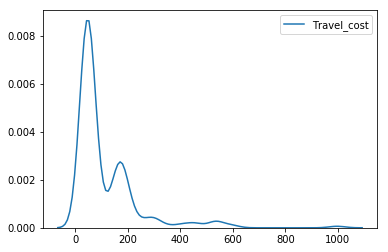

In [20]:
sns.kdeplot(data.Travel_cost)